In [1]:
!wget https://raw.githubusercontent.com/WildZes/Paul_Orland_Math_for_Programmers_practice/main/05_Computing_transformations_with_matrices/draw3d.py
!wget https://raw.githubusercontent.com/WildZes/Paul_Orland_Math_for_Programmers_practice/main/05_Computing_transformations_with_matrices/colors.py
!wget https://raw.githubusercontent.com/WildZes/Paul_Orland_Math_for_Programmers_practice/main/05_Computing_transformations_with_matrices/dino_vectors.py
!wget https://raw.githubusercontent.com/WildZes/Paul_Orland_Math_for_Programmers_practice/main/05_Computing_transformations_with_matrices/transforms.py
!wget https://raw.githubusercontent.com/WildZes/Paul_Orland_Math_for_Programmers_practice/main/05_Computing_transformations_with_matrices/vectors.py

--2022-09-08 19:55:27--  https://raw.githubusercontent.com/WildZes/Paul_Orland_Math_for_Programmers_practice/main/05_Computing_transformations_with_matrices/draw3d.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057 (4.9K) [text/plain]
Saving to: ‘draw3d.py’

draw3d.py           100%[===================>]   4.94K  --.-KB/s    in 0s      

2022-09-08 19:55:27 (64.7 MB/s) - ‘draw3d.py’ saved [5057/5057]

--2022-09-08 19:55:27--  https://raw.githubusercontent.com/WildZes/Paul_Orland_Math_for_Programmers_practice/main/05_Computing_transformations_with_matrices/colors.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|1

In [2]:
!wget https://raw.githubusercontent.com/WildZes/Paul_Orland_Math_for_Programmers_practice/main/05_Computing_transformations_with_matrices/vector_drawing.py

--2022-09-08 19:55:28--  https://raw.githubusercontent.com/WildZes/Paul_Orland_Math_for_Programmers_practice/main/05_Computing_transformations_with_matrices/vector_drawing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4645 (4.5K) [text/plain]
Saving to: ‘vector_drawing.py’

vector_drawing.py   100%[===================>]   4.54K  --.-KB/s    in 0s      

2022-09-08 19:55:28 (52.0 MB/s) - ‘vector_drawing.py’ saved [4645/4645]



In [3]:
from draw3d import *
from dino_vectors import *
from transforms import *

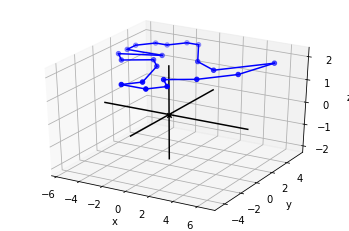

In [4]:
# Exercise 5.26
def polygon_segments_3d(points,color='blue'):
  count = len(points)
  return [Segment3D(points[i], points[(i+1) % count],color=color) for i in range(0,count)]
dino_3d = [(x,y,2) for x,y in dino_vectors]
draw3d(Points3D(*dino_3d, color='blue'),
       *polygon_segments_3d(dino_3d)
      )

In [5]:
magic_matrix = ((1,0,3),
                (0,1,1),
                (0,0,1)
               )
translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]
translated2d = [(x,y) for x,y,_ in translated]

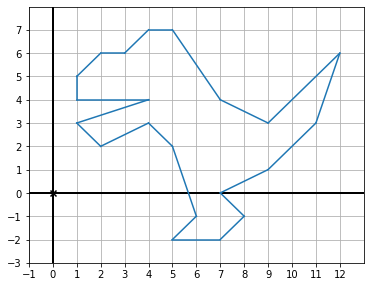

In [6]:
from vector_drawing import *
draw(Polygon(*translated2d))

In [7]:
# Exercise 5.27
def transform2d(vectors, translation):
  magic_matrix = ((1,0,translation[0]),
                  (0,1,translation[1]),
                  (0,0,1)
                 )
  vectors_3d = [(x,y,1) for x,y in vectors]
  translated = [multiply_matrix_vector(magic_matrix, v) for v in vectors_3d]
  return [(x,y) for x,y,_ in translated]

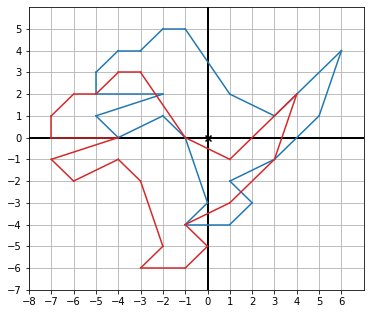

In [8]:
dino_2_2 = transform2d(dino_vectors, (-2,-2))
draw(Polygon(*dino_vectors), Polygon(*dino_2_2, color=red))

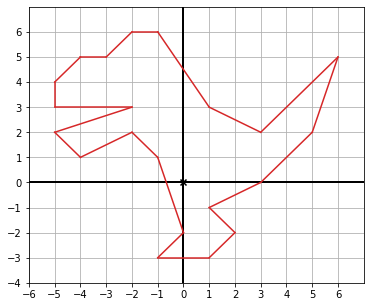

In [9]:
# Exercise 5.29—Mini Project
dino_3d = [(x,y,1) for x,y in dino_vectors]
dino45 = transform2d(dino_vectors, (0,1))
draw(Polygon(*dino45, color=red))

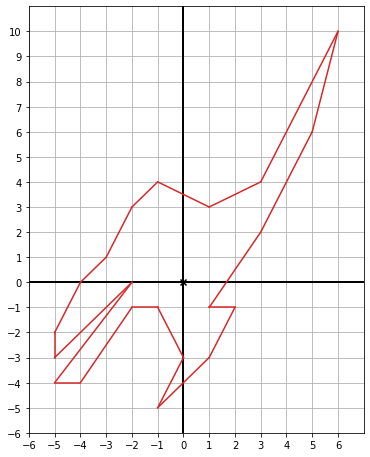

In [10]:
magic_matrix = ((1,0,0),
                (1,1,0),
                (0,0,1)
                )
translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]
tr2d = [(x,y) for x,y,_ in translated]
draw(Polygon(*tr2d, color=red))

In [11]:
# Solution from the book
from vectors import rotate2d
from transforms import *
from math import pi

In [12]:
rotate_45_degrees = curry2(rotate2d)(pi/4)
rotate_45_degrees

<function transforms.curry2.<locals>.g.<locals>.new_function(y)>

In [13]:
def infer_matrix(n, transformation):
    def standard_basis_vector(i):
        return tuple(1 if i==j else 0 for j in range(1,n+1))
    standard_basis = [standard_basis_vector(i) for i in range(1,n+1)]
    cols = [transformation(v) for v in standard_basis]
    return tuple(zip(*cols))

rotation_matrix = infer_matrix(2,rotate_45_degrees)
rotation_matrix

((0.7071067811865476, -0.7071067811865475),
 (0.7071067811865475, 0.7071067811865476))

In [14]:
scale_half = curry2(scale)(0.5)
scale_matrix = infer_matrix(2, scale_half)
scale_matrix

((0.5, 0.0), (0.0, 0.5))

In [15]:
def matrix_multiply(a,b):
    return tuple(tuple(dot(row,col) for col in zip(*b)) for row in a)
rotate_and_scale = matrix_multiply(scale_matrix,rotation_matrix)
rotate_and_scale

((0.3535533905932738, -0.35355339059327373),
 (0.35355339059327373, 0.3535533905932738))

In [16]:
((a,b),(c,d)) = rotate_and_scale
final_matrix = ((a,b,2),(c,d,2),(0,0,1))

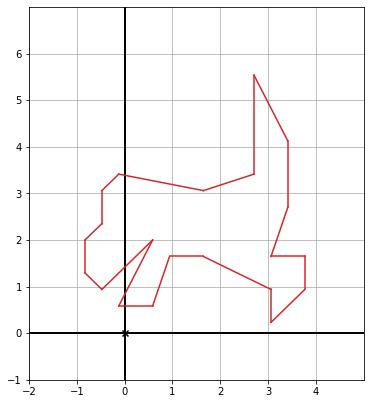

In [17]:
translated = [multiply_matrix_vector(final_matrix, v) for v in dino_3d]
tr2d = [(x,y) for x,y,_ in translated]
draw(Polygon(*tr2d, color=red))

In [19]:
# Exercise 5.30
scale_and_rotate = matrix_multiply(rotation_matrix, scale_matrix)
scale_and_rotate

((0.3535533905932738, -0.35355339059327373),
 (0.35355339059327373, 0.3535533905932738))

In [20]:
# Solution from the book
rotate_90 = ((0,-1,0),
             (1,0,0),
             (0,0,1)
             )
translate_31 = ((1,0,3),
                (0,1,1),
                (0,0,1)
                )
rotate_and_translate = matrix_multiply(rotate_90, translate_31)
rotate_and_translate

((0, -1, -1), (1, 0, 3), (0, 0, 1))

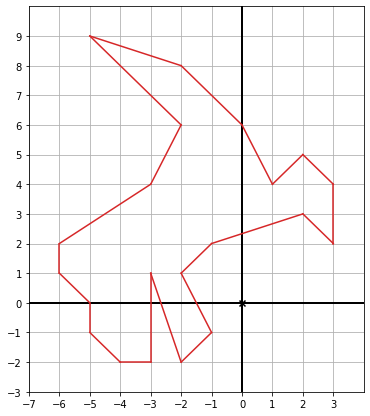

In [21]:
translated = [multiply_matrix_vector(rotate_and_translate, v) for v in dino_3d]
tr2d = [(x,y) for x,y,_ in translated]
draw(Polygon(*tr2d, color=red))

In [22]:
# Exercise 5.31
def transform3d(vectors, translation):
  magic_matrix = ((1,0,0,translation[0]),
                  (0,1,0,translation[1]),
                  (0,0,1,translation[2]),
                  (0,0,0,1)
                 )
  vectors_4d = [(x,y,z,1) for x,y,z in vectors]
  translated = [multiply_matrix_vector(magic_matrix, v) for v in vectors_4d]
  return [(x,y,z) for x,y,z,_ in translated]

In [23]:
# Solution from the book
def translate_4d(translation):
  def new_function(target):
    a,b,c,d = translation
    x,y,z,w = target
    matrix = (
    (1,0,0,0,a),
    (0,1,0,0,b),
    (0,0,1,0,c),
    (0,0,0,1,d),
    (0,0,0,0,1))
    vector = (x,y,z,w,1)
    x_out,y_out,z_out,w_out,_ = multiply_matrix_vector(matrix,vector)
    return (x_out,y_out,z_out,w_out)
  return new_function

In [24]:
translate_4d((1,2,3,4))((10,20,30,40))

(11, 22, 33, 44)